<a href="https://colab.research.google.com/github/HiranMayiNathi23/Smart-Basket/blob/main/SmartBasket_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Data Loading and Initial Preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
df = pd.read_csv('BigBasket Products.csv', encoding='latin1')

In [ ]:
df.head()

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...


In [ ]:
# Drop the automatically added index column if present
if 'index' in df.columns:
    df = df.drop(columns=['index'])

In [ ]:
df.head(3)

,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."


In [ ]:
# Drop any irrelevant columns (e.g., rating if present)
df.drop(columns=['rating'], inplace=True, errors='ignore')

In [ ]:
print(f"Dataset shape: {df.shape}")
df.head(3)

Dataset shape: (27555, 8)


,product,category,sub_category,brand,sale_price,market_price,type,description
0,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,This Product contains Garlic Oil that is known...
1,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,"Each product is microwave safe (without lid), ..."
2,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,"A perfect gift for all occasions, be it your m..."


In [ ]:
# Convert price columns to numeric, drop rows with missing critical fields
df['sale_price'] = pd.to_numeric(df['sale_price'], errors='coerce')
df['market_price'] = pd.to_numeric(df['market_price'], errors='coerce')
df = df.dropna(subset=['product','category','brand','type','description','sale_price','market_price'])
df['discount_%'] = (df['market_price'] - df['sale_price']) / df['market_price'] * 100


In [ ]:
print(df[['product','category','brand','type','sale_price','market_price','discount_%']].head(3))
print("\nColumns:", df.columns.tolist())
print(df.info())

                                  product                category  \
0  Garlic Oil - Vegetarian Capsule 500 mg        Beauty & Hygiene   
1                   Water Bottle - Orange  Kitchen, Garden & Pets   
2          Brass Angle Deep - Plain, No.2    Cleaning & Household   

               brand                    type  sale_price  market_price  \
0  Sri Sri Ayurveda         Hair Oil & Serum       220.0         220.0   
1         Mastercook  Water & Fridge Bottles       180.0         180.0   
2                Trm         Lamp & Lamp Oil       119.0         250.0   

   discount_%  
0         0.0  
1         0.0  
2        52.4  

Columns: ['product', 'category', 'sub_category', 'brand', 'sale_price', 'market_price', 'type', 'description', 'discount_%']
<class 'pandas.core.frame.DataFrame'>
Index: 27439 entries, 0 to 27554
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product       27439 non-null  object 
 1  

In [ ]:
#Selling Price Prediction (Regression)
from sklearn.preprocessing import LabelEncoder

le_cat = LabelEncoder()
le_subcat = LabelEncoder()
le_brand = LabelEncoder()
le_type = LabelEncoder()

df['cat_enc'] = le_cat.fit_transform(df['category'])
df['subcat_enc'] = le_subcat.fit_transform(df['sub_category'])
df['brand_enc'] = le_brand.fit_transform(df['brand'])
df['type_enc'] = le_type.fit_transform(df['type'])


In [ ]:
# We select these encoded features and the market price (MRP) for prediction
features = ['cat_enc','subcat_enc','brand_enc','type_enc','market_price']
X = df[features]
y = df['sale_price']

In [ ]:
# Split the data into train and test sets, and train regression models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_test)
mse_lr = mean_squared_error(y_test, pred_lr)
r2_lr = r2_score(y_test, pred_lr)

In [ ]:
# Random Forest Regression model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, pred_rf)
r2_rf = r2_score(y_test, pred_rf)

In [ ]:
print(f"Linear Regression RMSE: {np.sqrt(mse_lr):.2f}, R²: {r2_lr:.3f}")
print(f"Random Forest RMSE:    {np.sqrt(mse_rf):.2f}, R²: {r2_rf:.3f}")

Linear Regression RMSE: 124.14, R²: 0.936
Random Forest RMSE:    91.36, R²: 0.965


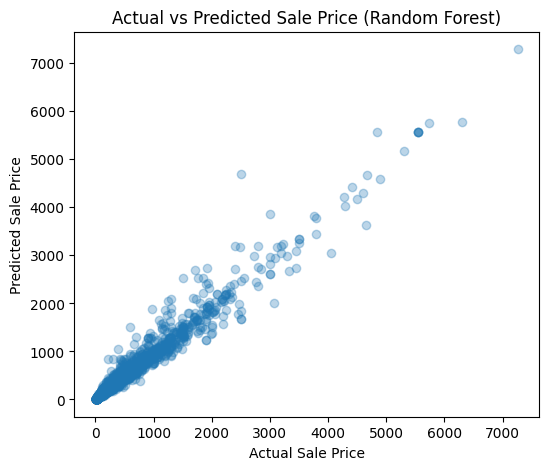

In [ ]:
# actual vs. predicted prices plot
plt.figure(figsize=(6,5))
plt.scatter(y_test, pred_rf, alpha=0.3)
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs Predicted Sale Price (Random Forest)")
plt.show()

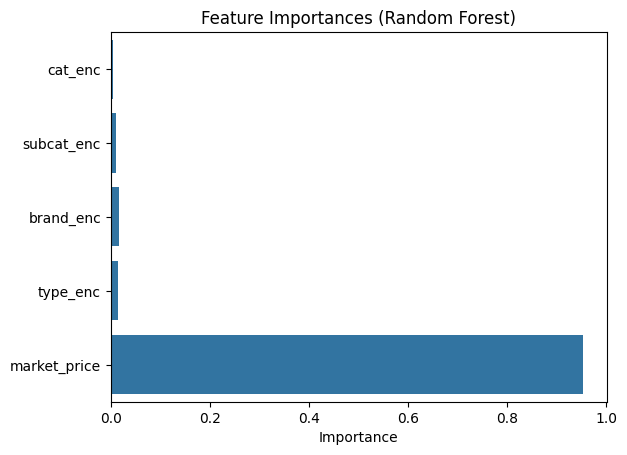

In [ ]:
importances = rf.feature_importances_
sns.barplot(x=importances, y=features)
plt.title("Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.show()

In [ ]:
# Discount Percentage Estimation
X = df[['cat_enc','subcat_enc','brand_enc','type_enc','market_price']]
y_disc = df['discount_%']
X_train, X_test, y_train_disc, y_test_disc = train_test_split(X, y_disc, test_size=0.2, random_state=42)

In [ ]:
# The results quantify how well we can predict the discount percentage from product features.
rf_disc = RandomForestRegressor(n_estimators=100, random_state=42)
rf_disc.fit(X_train, y_train_disc)
pred_disc = rf_disc.predict(X_test)
mse_disc = mean_squared_error(y_test_disc, pred_disc)
r2_disc = r2_score(y_test_disc, pred_disc)
print(f"Discount Prediction RMSE: {np.sqrt(mse_disc):.2f}, R²: {r2_disc:.3f}")


Discount Prediction RMSE: 8.62, R²: 0.655


In [ ]:
# Product Categorization (Classification)
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english', max_features=500)
X_text = tfidf.fit_transform(df['description'])


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_cat = df['category']
X_train_txt, X_test_txt, y_train_cat, y_test_cat = train_test_split(X_text, y_cat, test_size=0.2, random_state=42)
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_txt, y_train_cat)
pred_cat = clf.predict(X_test_txt)

acc = accuracy_score(y_test_cat, pred_cat)
print(f"Category Classification Accuracy: {acc:.3f}")
print("\nClassification Report:\n", classification_report(y_test_cat, pred_cat, zero_division=0))


Category Classification Accuracy: 0.779

Classification Report:
                           precision    recall  f1-score   support

               Baby Care       0.93      0.70      0.80       128
   Bakery, Cakes & Dairy       0.78      0.45      0.57       177
        Beauty & Hygiene       0.89      0.96      0.92      1548
               Beverages       0.67      0.48      0.56       176
    Cleaning & Household       0.83      0.80      0.82       545
       Eggs, Meat & Fish       0.94      0.49      0.65        65
Foodgrains, Oil & Masala       0.74      0.73      0.74       541
     Fruits & Vegetables       0.97      0.73      0.83       113
    Gourmet & World Food       0.61      0.73      0.66       930
  Kitchen, Garden & Pets       0.88      0.85      0.87       719
  Snacks & Branded Foods       0.59      0.55      0.57       546

                accuracy                           0.78      5488
               macro avg       0.80      0.68      0.73      5488
         

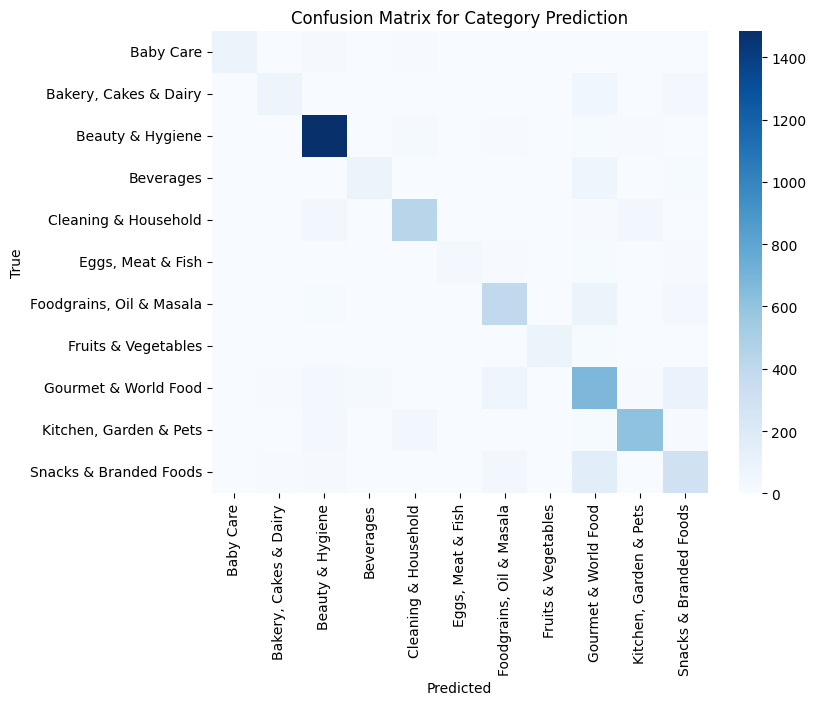

In [ ]:
# A confusion matrix visualizes misclassifications
cm = confusion_matrix(y_test_cat, pred_cat, labels=clf.classes_)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=False, fmt='d',
            xticklabels=clf.classes_, yticklabels=clf.classes_, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Category Prediction')
plt.show()


In [ ]:
#Recommendation System (Content-Based)
#Finally, we build a simple content-based recommender: given a product, recommend similar products based on description.

from sklearn.metrics.pairwise import cosine_similarity

tfidf_rec = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_rec.fit_transform(df['description'].fillna(''))
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

def recommend(product_name, top_n=5):
    """Return top-n product recommendations for a given product name."""
    if product_name not in df['product'].values:
        return []
    idx = df.index[df['product'] == product_name][0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    top_indices = [i for i, score in sim_scores[1:top_n+1]]
    return df['product'].iloc[top_indices].tolist()

In [ ]:
# Example usage
sample_product = df['product'].iloc[0]
print(f"Product: {sample_product}")
print("Similar products:", recommend(sample_product, top_n=5))

Product: Garlic Oil - Vegetarian Capsule 500 mg
Similar products: ['Garlic Oil - Vegetarian Capsule 500 mg', 'Code Vaporisateur Natural Spray for Men', 'Bathing Soap (Lavender & Milk Cream)', 'Moisturise Lotion - Body Cocoon', 'Laboratory Reagent CH3, CO, CH3']


In [ ]:
sample_product = df['product'].iloc[110]
print(f"Product: {sample_product}")
print("Similar products:", recommend(sample_product, top_n=5))

Product: Incense Sticks - Sandal
Similar products: ['Natural Honey Dhoop Sticks - FG10885HNYB', 'Avida 3-in-1 Semi Economy Pouch -  FG01248', 'Kasturi Economy Long Box - FG12324', '1947 Flora Natural Aroma Incense Sticks - Economy Pack', 'Blue Musk Economy Long Box - FG00624']
